In [2]:
# Import Libraries

#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
from datetime import datetime
from datetime import date

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Load Dataset
file_path="/content/Online Retail.xlsx"
df= pd.read_excel(file_path)

In [4]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Dataset Rows & Columns count
print(df.shape)
print(f"total number of rows in given data set is {df.shape[0]}")
print(f"total number of columns in given data set is {df.shape[1]}")

(541909, 8)
total number of rows in given data set is 541909
total number of columns in given data set is 8


In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

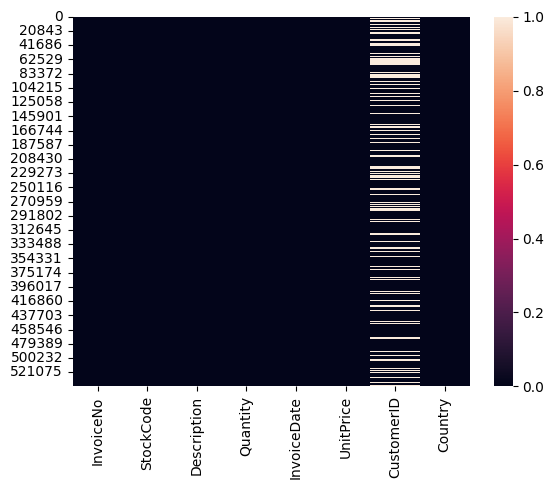

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull() )

In [11]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

<ipython-input-12-1fb2dbb7a3f1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [13]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


In [14]:
# Write your code to make your dataset analysis ready.
# created new column total sell
df['Total_sell']=df["Quantity"]*df["UnitPrice"]



In [15]:
# data set column after adding new column
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_sell'],
      dtype='object')

In [16]:
# Most Baught Items
baught_iteams=df.Description.value_counts()
baught_iteams=baught_iteams.sort_values(ascending=False).reset_index().head(10)
baught_iteams.columns = ['Item Description', 'Count']
baught_iteams

,Item Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638
5,ASSORTED COLOUR BIRD ORNAMENT,1501
6,SET OF 3 CAKE TINS PANTRY DESIGN,1473
7,PACK OF 72 RETROSPOT CAKE CASES,1385
8,LUNCH BAG BLACK SKULL.,1350
9,NATURAL SLATE HEART CHALKBOARD,1280


In [17]:
fig = px.pie(baught_iteams, values='Count', names='Item Description', title='Most baught item')
fig.show()

In [18]:
# country count
Total_country=df.Country.value_counts()
Total_country=Total_country.reset_index()
Total_country.columns = ['Country Name', 'Count']
Total_country

,Country Name,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [19]:
fig = px.pie(Total_country, values='Count', names='Country Name',
             title='Population of American continent',
             hover_data=['Country Name'], labels={'Country Name':'Country Name'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [20]:
# top  10 item purchase on country
most_iteam_purchase=df.groupby(["Country"])['Quantity'].sum()
most_iteam_purchase=most_iteam_purchase.sort_values(ascending=False).head(10).reset_index()
most_iteam_purchase

,Country,Quantity
0,United Kingdom,4263829
1,Netherlands,200128
2,EIRE,142637
3,Germany,117448
4,France,110480
5,Australia,83653
6,Sweden,35637
7,Switzerland,30325
8,Spain,26824
9,Japan,25218


In [21]:
fig = px.bar(most_iteam_purchase, x='Country', y='Quantity')
fig.show()

In [22]:
# Top  10 country from which retail shops earns
Top_earning=df.groupby(['Country'])['Total_sell'].sum()
Top_earning=Top_earning.sort_values(ascending=False).reset_index().head(10)
Top_earning

,Country,Total_sell
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


<Axes: xlabel='Country', ylabel='Total_sell'>

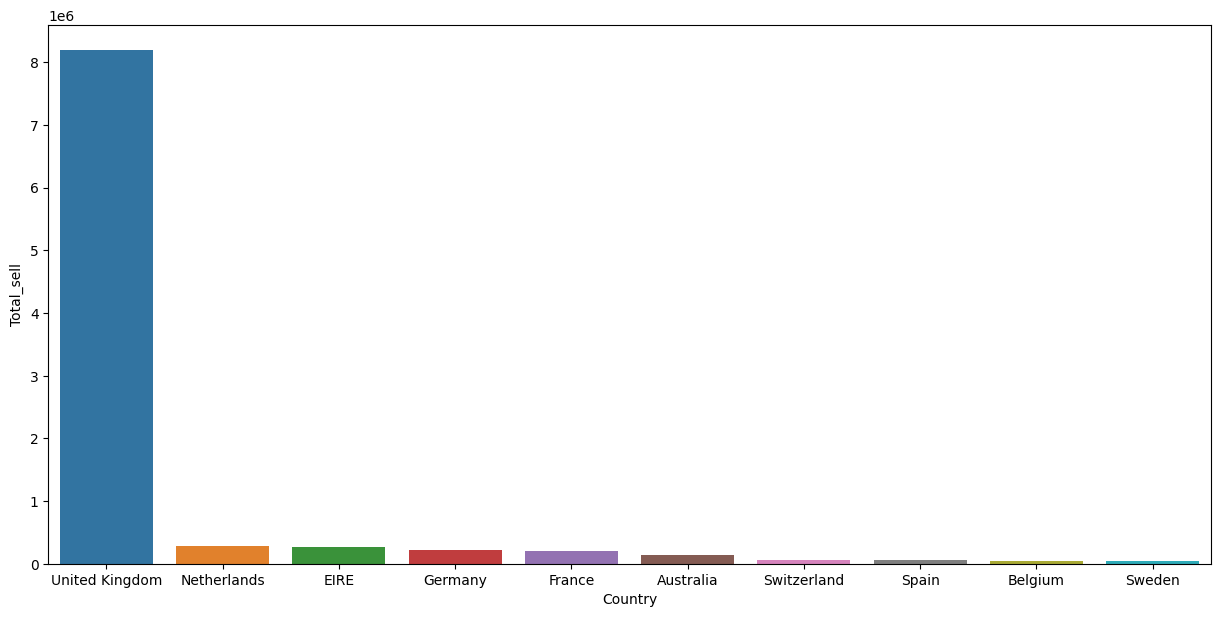

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(data=Top_earning, x="Country", y="Total_sell")

In [24]:
# most baught itam
Most_baught_item=df.groupby(["Description"]).agg({'Quantity':sum,'Total_sell':sum})
Most_baught_item=Most_baught_item.sort_values( by=['Quantity','Total_sell'], ascending=False).head(5)

# Most_baught_item.sort_values( by=['Quantity','Total_sell'], ascending=False)

Most_baught_item




,Quantity,Total_sell
Description,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
JUMBO BAG RED RETROSPOT,47363,92356.03
ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
POPCORN HOLDER,36334,33969.46
PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72


Axes(0.125,0.11;0.62x0.77)


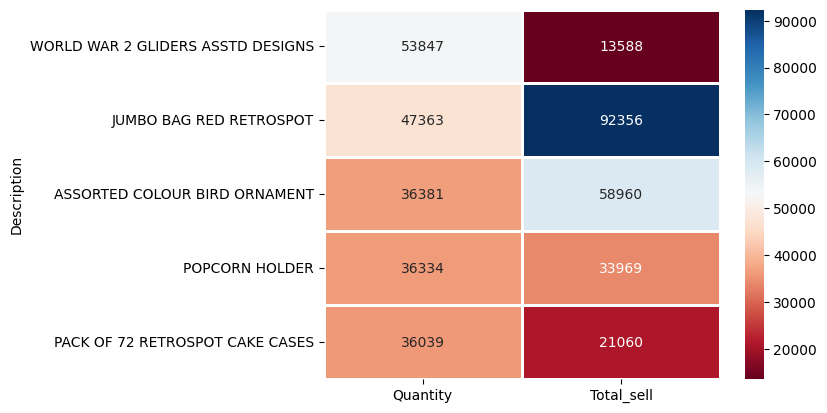

In [25]:
Most_baught_item=sns.heatmap(Most_baught_item, cmap='RdBu' , annot=True , fmt=".0f",linewidths=1 )
print(Most_baught_item)

In [26]:
# stock code revenue
total_sell_asstockcoed=df.groupby(["StockCode"])['Total_sell'].sum().sort_values(ascending=False).reset_index().head()
total_sell_asstockcoed

,StockCode,Total_sell
0,DOT,206245.48
1,22423,164762.19
2,47566,98302.98
3,85123A,97894.50
4,85099B,92356.03


<Figure size 640x480 with 0 Axes>

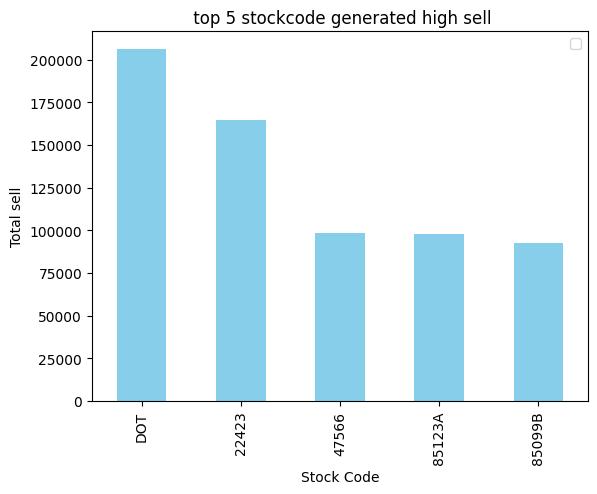

In [27]:
plt.figure()

total_sell_asstockcoed.plot.bar(x ='StockCode', y='Total_sell', rot=0, color='skyblue')
plt.xlabel('Stock Code')
plt.ylabel('Total sell')
plt.title(' top 5 stockcode generated high sell')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()

In [28]:
# top 10 high cost invoce generated

top_invice=df.groupby(['InvoiceNo'])['Total_sell'].sum().sort_values(ascending=False).reset_index().head(10)
top_invice

,InvoiceNo,Total_sell
0,581483,168469.60
1,541431,77183.60
2,574941,52940.94
3,576365,50653.91
4,556444,38970.00
5,567423,31698.16
6,556917,22775.93
7,572209,22206.00
8,567381,22104.80
9,563614,21880.44


In [29]:
fig = px.pie(top_invice, values='Total_sell', names='InvoiceNo', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

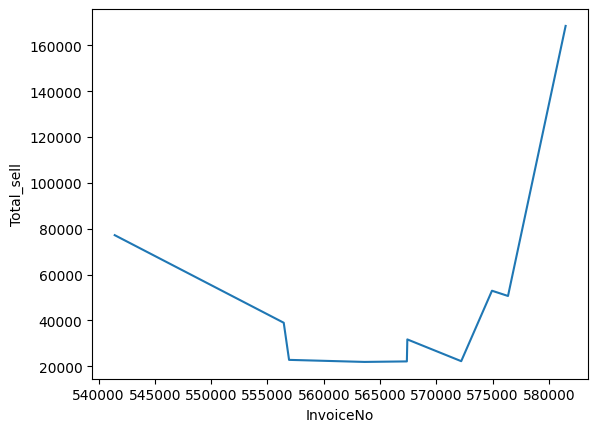

In [30]:
sns.lineplot(x="InvoiceNo", y="Total_sell", data=top_invice)
plt.show()

In [31]:

# top 10 most purchase item  invoce generated

top_Quant_invice=df.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
top_Quant_invice



,InvoiceNo,Quantity
0,581483,80995
1,541431,74215
2,556917,15049
3,563076,14730
4,574941,14149
5,576365,13956
6,572035,13392
7,567423,12572
8,578841,12540
9,552883,12266


/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



<Figure size 640x480 with 0 Axes>

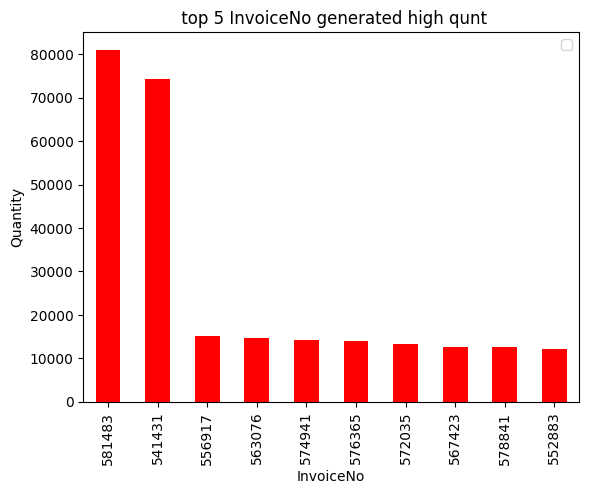

In [32]:
plt.figure()

top_Quant_invice.plot.bar(x ='InvoiceNo', y='Quantity', rot=0, color='red')
plt.xlabel('InvoiceNo')
plt.ylabel('Quantity')
plt.title(' top 5 InvoiceNo generated high qunt')
plt.xticks(rotation='vertical', size=10)

plt.legend('')


plt.show()

#Hypothesis Testing

##Hypothesis

In [33]:
# Perform Statistical Test to obtain P-Value

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
import math
from statsmodels.stats import weightstats as stests
print(df['Quantity'].mean())
df[['Quantity']].describe()
ztest ,propability_value = stests.ztest(df['Quantity'], x2=None, value=9)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

9.55224954743324
P Value is : 0.062300913172767466
Null hyphothesis accepted , Alternative hyphothesis rejected


##Hypothesis 2

In [34]:
# Perform Statistical Test to obtain P-Value

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import *
import math
from statsmodels.stats import weightstats as stests
print(df['UnitPrice'].mean())
df[['UnitPrice']].describe()
ztest ,propability_value = stests.ztest(df['UnitPrice'], x2=None, value=4)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")


4.611113626088513
P Value is : 3.330223529043396e-06
Null hyphothesis rejected , Alternative hyphothesis accepted


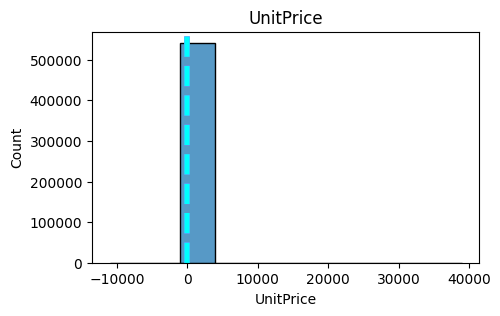

In [35]:
fig=plt.figure(figsize=(5,3))
ax=fig.gca()
feature= (df['UnitPrice'])
sns.histplot(df['UnitPrice'],bins=10)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=4)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('UnitPrice')
plt.show()

##Hypothesis 3

In [36]:
# Perform Statistical Test to obtain P-Value
print(df['Total_sell'].mean())
df[['Total_sell']].describe()
ztest ,propability_value = stests.ztest(df['Total_sell'], x2=None, value=16)
print(f"P Value is : {float(propability_value)}")
if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

17.98779487699964
P Value is : 0.00011205335704471761
Null hyphothesis rejected , Alternative hyphothesis accepted


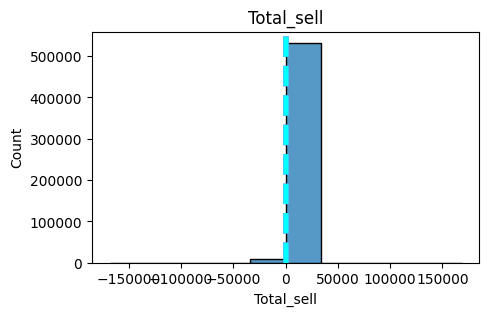

In [37]:
fig=plt.figure(figsize=(5,3))
ax=fig.gca()
feature= (df['Total_sell'])
sns.histplot(df['Total_sell'],bins=10)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=4)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title('Total_sell')
plt.show()

#Feature Engineering & Data Pre-processing

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Total_sell          0
dtype: int64


<Axes: >

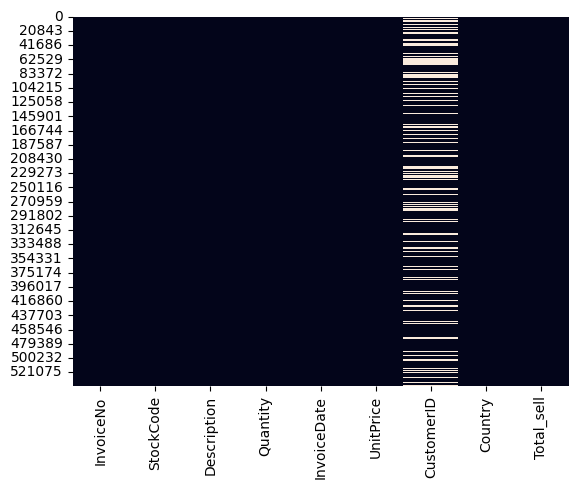

In [38]:
# Missing Values/Null Values Count
print(df.isnull().sum())


# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [39]:
# missing values percentage
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
Total_sell      0.00
dtype: float64

In [40]:
# droping all rows having missing values
df = df.dropna()
df.shape

(406829, 9)

In [41]:
# After dropping null values data set view
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [42]:
# total revenue generated
# monetary
total_revenue = df.groupby('CustomerID')['Total_sell'].sum()
total_revenue = total_revenue.reset_index()
total_revenue.head()

,CustomerID,Total_sell
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [43]:
# total_transaction
total_transaction = df.groupby('CustomerID')['InvoiceNo'].count()
total_transaction = total_transaction.reset_index()
total_transaction.columns = ['CustomerID', 'Total_transaction']
total_transaction.head()

,CustomerID,Total_transaction
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [44]:
# merging total transction and total sell
# merge the two dfs
total_revenue = pd.merge(total_revenue, total_transaction, on='CustomerID', how='inner')
total_revenue.head()

,CustomerID,Total_sell,Total_transaction
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [45]:
# last day purchase 
# max day
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [46]:
# compute the diff
df['day_difference'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sell,day_difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [47]:
# recency
recent_purchase = df.groupby('CustomerID')['day_difference'].min()
recent_purchase = recent_purchase.reset_index()
recent_purchase.head()

,CustomerID,day_difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [48]:
# merging  total sell, day_difference and total_transaction
grouped_df = pd.merge(total_revenue, recent_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [49]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe35b9d9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe35bab340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe35b9d430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe35bab7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe35bab520>],
 'means': []}

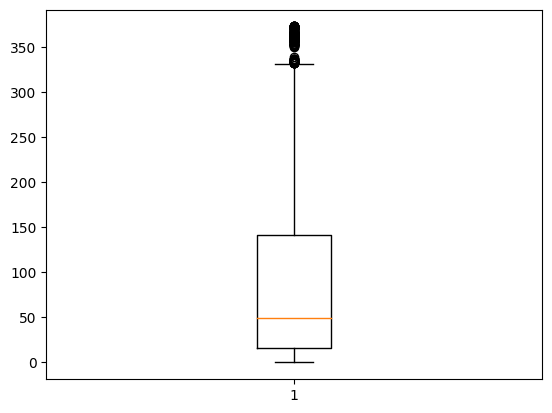

In [50]:
# Handling Outliers & Outlier treatments
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

In [51]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]



{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe3f3fe190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe3f0fa9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe3f3febe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe3f41e670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe3f41ef10>],
 'means': []}

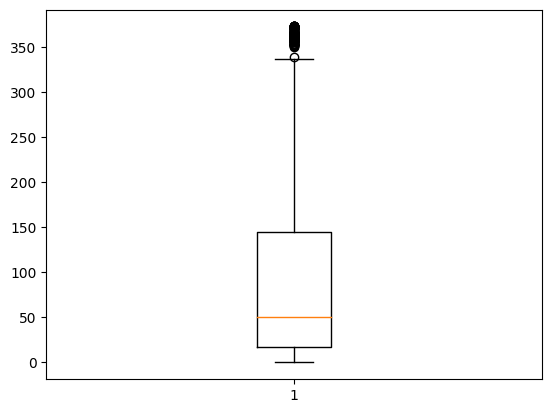

In [52]:
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe38782130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe38782f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe38782d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe38751280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe38751be0>],
 'means': []}

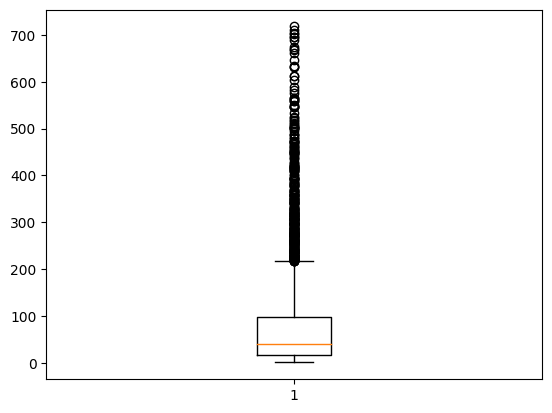

In [53]:
# 2. outlier treatment
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe417c2d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe392381f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe417c2af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe39238730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe392389d0>],
 'means': []}

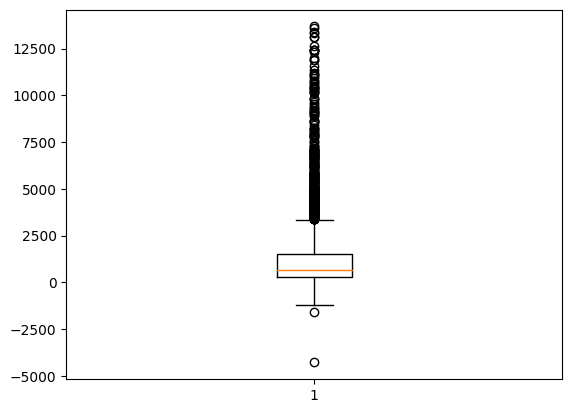

In [54]:
# 3. outlier treatment
plt.boxplot(grouped_df['amount'])

In [55]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['Description', 'StockCode', 'InvoiceDate', 'Country', 'InvoiceNo']


In [56]:
# Manipulate Features to minimize feature correlation and create new features

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Total_sell', 'day_difference'],
      dtype='object')

In [57]:
# Select your features wisely to avoid overfitting
# Remove column name 'CustomerID'
df.drop(['CustomerID'], axis=1,inplace=True)


In [58]:
# Scaling your data
# creating scaled df
scaled_df=grouped_df[["amount","frequency","recency"]]

In [59]:
# create instance
scaler=StandardScaler()

In [60]:
# fit scaled transform
trans_scaled_df=scaler.fit_transform(scaled_df)

In [61]:
trans_scaled_df

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [62]:
# convert into pandas data form
trans_scaled_df=pd.DataFrame(trans_scaled_df)

In [63]:
trans_scaled_df.columns=["amount","frequency","recency"]

In [64]:
trans_scaled_df

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


#ML Model Implementation

In [65]:
# ML Model - 1 Implementation
kmean_clustor=KMeans(n_clusters=4, max_iter=50)
kmean_clustor


KMeans(max_iter=50, n_clusters=4)

In [66]:
# Fit the Algorithm
kmean_clustor.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=4)

In [67]:
kmean_clustor.labels_

array([2, 3, 0, ..., 2, 0, 0], dtype=int32)

In [68]:
from tabulate import tabulate
# silhouette_score
clustor_ranged=[2,3,4,5,6,7,8]
for nm_clustors in clustor_ranged:
  kmean_clustor=KMeans(n_clusters=nm_clustors, max_iter=50)
  kmean_clustor.fit(trans_scaled_df)

  silhoutte_analysis=silhouette_score(trans_scaled_df,kmean_clustor.labels_)
  print("for n_clustors={0},the silhotte score is {1}".format(nm_clustors,silhoutte_analysis))




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=2,the silhotte score is 0.5415858652525395


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=3,the silhotte score is 0.5084896296141937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=4,the silhotte score is 0.4817567985759693


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=5,the silhotte score is 0.46464537019783203


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=6,the silhotte score is 0.41698971636412085


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=7,the silhotte score is 0.41763065866927357


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=8,the silhotte score is 0.3950923110786091


In [69]:
# Visualizing evaluation Metric Score chart

# Sum squred distance
ssd=[ ]
clustor_ranged=[2,3,4,5,6,7,8]
for n_clustors in clustor_ranged:
  kmean_clustor=KMeans(n_clusters=n_clustors, max_iter=50)
  kmean_clustor.fit(trans_scaled_df)
  ssd.append(kmean_clustor.inertia_)




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

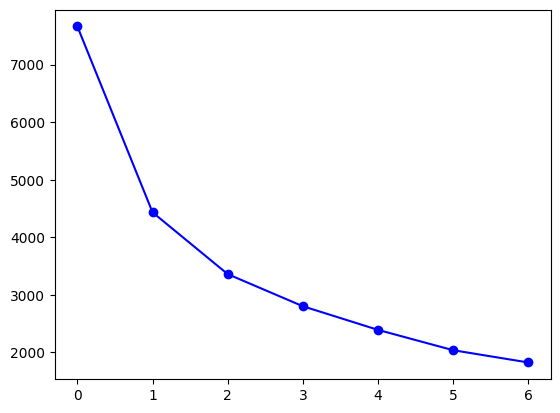

In [70]:
plt.plot(ssd,'o-b')


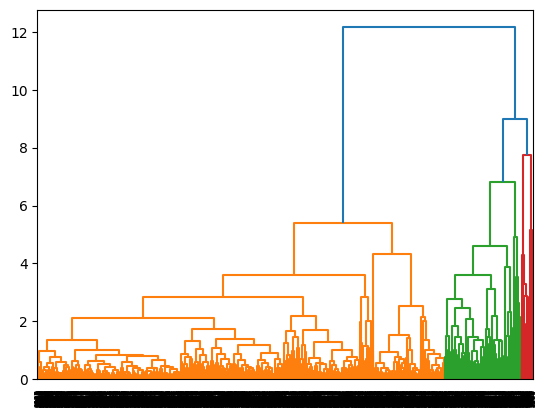

In [71]:
dend=linkage(trans_scaled_df,method='complete',metric='euclidean')
dendrogram(dend)
plt.show()

In [72]:

kmean_clustor1=KMeans(n_clusters=3, max_iter=50)

In [73]:
kmean_clustor1.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=3)

In [74]:
kmean_clustor1.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [75]:
# Visualizing evaluation Metric Score chart
# silhouette_score
clustor_ranged=[2,3,4,5,6,7,8]
for nm_clustors in clustor_ranged:
  kmean_clustor1=KMeans(n_clusters=nm_clustors, max_iter=50)
  kmean_clustor1.fit(trans_scaled_df)

  silhoutte_analysis=silhouette_score(trans_scaled_df,kmean_clustor1.labels_)
  print("for n_clustors={0},the silhotte score is {1}".format(nm_clustors,silhoutte_analysis))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=2,the silhotte score is 0.5415858652525395


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=3,the silhotte score is 0.5084896296141937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=4,the silhotte score is 0.4819322183737683


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=5,the silhotte score is 0.46627005641897035


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=6,the silhotte score is 0.41759340426856373


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=7,the silhotte score is 0.41489571662090957


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=8,the silhotte score is 0.40958630945020674


In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Sum squred distance
ssd=[ ]
clustor_ranged=[2,3,4,5,6,7,8]
for n_clustors in clustor_ranged:
  kmean_clustor1=KMeans(n_clusters=n_clustors, max_iter=50)
  kmean_clustor1.fit(trans_scaled_df)
  ssd.append(kmean_clustor1.inertia_)





/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

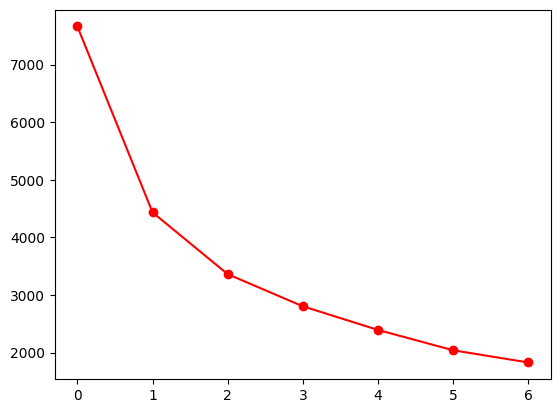

In [77]:
plt.plot(ssd,'o-r')

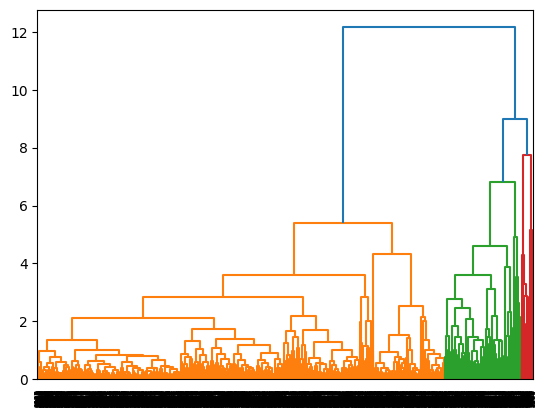

In [78]:
dend=linkage(trans_scaled_df,method='complete',metric='euclidean')
dendrogram(dend)
plt.show()

In [79]:
# ML Model - 3 Implementation
kmean_clustor2=KMeans(n_clusters=5, max_iter=50)



In [80]:
# Fit the Algorithm
kmean_clustor2.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=5)

In [81]:
# Visualizing evaluation Metric Score chart
# silhouette_score
clustor_ranged=[2,3,4,5,6,7,8]
for nm_clustors in clustor_ranged:
  kmean_clustor2=KMeans(n_clusters=nm_clustors, max_iter=50)
  kmean_clustor2.fit(trans_scaled_df)

  silhoutte_analysis=silhouette_score(trans_scaled_df,kmean_clustor2.labels_)
  print("for n_clustors={0},the silhotte score is {1}".format(nm_clustors,silhoutte_analysis))


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=2,the silhotte score is 0.5415858652525395


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=3,the silhotte score is 0.5084896296141937


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=4,the silhotte score is 0.48166097487908327


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=5,the silhotte score is 0.46627005641897035


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=6,the silhotte score is 0.41753051875511704


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=7,the silhotte score is 0.4148135240307191


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



for n_clustors=8,the silhotte score is 0.39439948764516547


In [82]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Sum squred distance
ssd=[ ]
clustor_ranged=[2,3,4,5,6,7,8]
for n_clustors in clustor_ranged:
  kmean_clustor2=KMeans(n_clusters=n_clustors, max_iter=50)
  kmean_clustor2.fit(trans_scaled_df)
  ssd.append(kmean_clustor2.inertia_)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

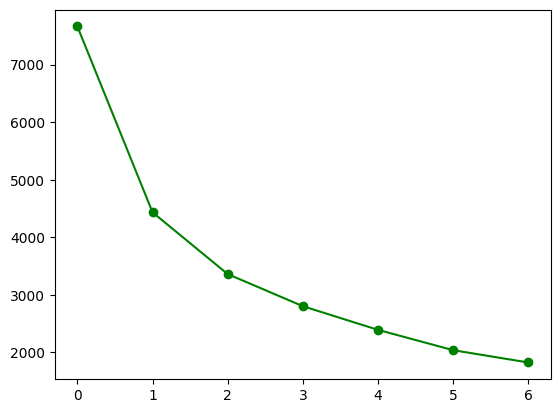

In [83]:
plt.plot(ssd,'o-g')

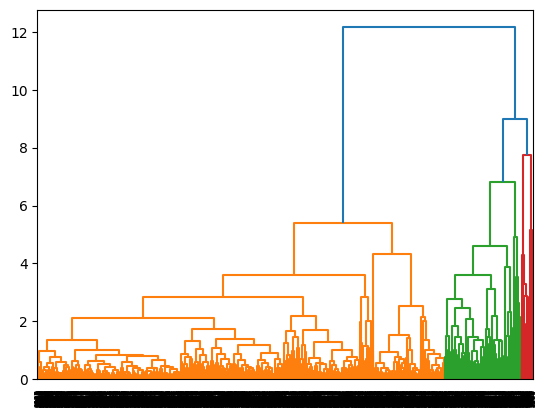

In [84]:
dend=linkage(trans_scaled_df,method='complete',metric='euclidean')
dendrogram(dend)
plt.show()

In [85]:
# Implementation
kmean_clustor=KMeans(n_clusters=3, max_iter=50)
kmean_clustor


KMeans(max_iter=50, n_clusters=3)

In [86]:
# Fit the Algorithm
kmean_clustor.fit(trans_scaled_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=50, n_clusters=3)

In [87]:
kmean_clustor.labels_

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [88]:
# Data set 
grouped_df['clustor_id']=kmean_clustor.labels_
grouped_df

,CustomerID,amount,frequency,recency,clustor_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,1
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,1


<Axes: xlabel='clustor_id', ylabel='amount'>

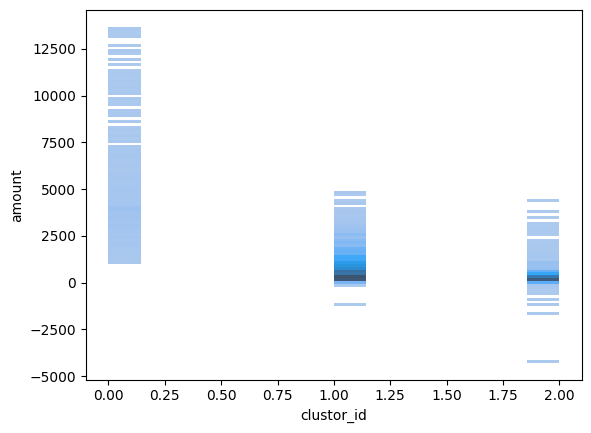

In [89]:
sns.histplot(x="clustor_id",y="amount",data=grouped_df)

<Axes: xlabel='clustor_id', ylabel='frequency'>

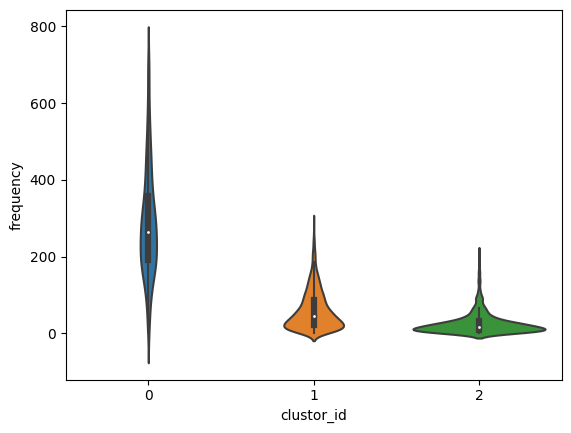

In [90]:
sns.violinplot(x="clustor_id",y="frequency",data=grouped_df)

<Axes: xlabel='clustor_id', ylabel='recency'>

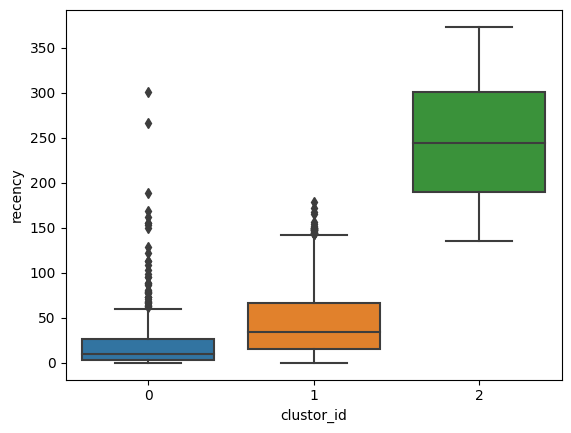

In [91]:
sns.boxplot(x="clustor_id",y="recency",data=grouped_df)

*  White Hanging heat T-Light holder is the most demanding gift of all.
*  Lunch bag black skull is the least demanding gift of all.

*  The UK has placed maximum orders for unique gift items.
*  After the UK, Germany placed maximum orders for unique gift items.

*  The UK has to purchase a total of $4.2 million in gift items.

*  The Netherlands has purchased a total of $200 k gift items.

*  Online retail gift shop generates $ 8 + million in revenue from the UK only.

*  WORLD WAR 2 GLIDERS is the most bought item ever with 53847 quantity.

*  DOT stock code gift generated a total of $ 2,06,245 in revenue.

*  22423 Stock code gift generated a total of $ 1,64,762 in revenue.

*  invoice NO 581483 has a total of $ 168469 sold.

*  invoice NO 541431 has a total of $ 77183.60 sold.

*  invoice NO 581483 has a total of $ 168469 sold.

* invoice NO 541431 has a total of $ 77183.60 sold

*  invoice NO 581483 contains a total of 80995 quantity gift items.


*  invoice NO  541431	contain a total	of 74215 quantity gift items..